# Credit Risk & Machine Learning

![logo](bank-credit-card-icon.jpg)

In [73]:
import pandas as pd
import numpy as np

# Preprocessing

In [304]:
credit_raw_df = pd.read_csv("credit_risk.csv", index_col=False)

In [305]:
#explore data
print(credit_raw_df.dtypes)
print(credit_raw_df.shape)
credit_raw_df.head()

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(981, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Subtituting Binary Columns

In [306]:
#combine binary columns into a seperate df
df1 = credit_raw_df[['Gender', 
                    'Married', 
                    'Dependents', 
                    'Education', 
                    'Self_Employed', 
                    'Credit_History',
                    'Property_Area',
                    'Loan_Status']]

#find value_counts for the binary columns
for col in df1:
    print('\n')
    print(df1[col].value_counts())



Male      775
Female    182
Name: Gender, dtype: int64


Yes    631
No     347
Name: Married, dtype: int64


0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64


Graduate        763
Not Graduate    218
Name: Education, dtype: int64


No     807
Yes    119
Name: Self_Employed, dtype: int64


1.0    754
0.0    148
Name: Credit_History, dtype: int64


Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


Y    712
N    269
Name: Loan_Status, dtype: int64


In [307]:
#changing binary columns to numeric

credit_raw_df['Gender'].values[credit_raw_df['Gender'] == 'Female'] = 0
credit_raw_df['Gender'].values[credit_raw_df['Gender'] == 'Male'] = 1

credit_raw_df['Married'].values[credit_raw_df['Married'] == 'No'] = 0
credit_raw_df['Married'].values[credit_raw_df['Married'] == 'Yes'] = 1

credit_raw_df['Dependents'].values[credit_raw_df['Dependents'] == '3+'] = 3

credit_raw_df['Education'].values[credit_raw_df['Education'] == 'Not Graduate'] = 0
credit_raw_df['Education'].values[credit_raw_df['Education'] == 'Graduate'] = 1

credit_raw_df['Self_Employed'].values[credit_raw_df['Self_Employed'] == 'No'] = 0
credit_raw_df['Self_Employed'].values[credit_raw_df['Self_Employed'] == 'Yes'] = 1

credit_raw_df['Property_Area'].values[credit_raw_df['Property_Area'] == 'Rural'] = 0
credit_raw_df['Property_Area'].values[credit_raw_df['Property_Area'] == 'Semiurban'] = 1
credit_raw_df['Property_Area'].values[credit_raw_df['Property_Area'] == 'Urban'] = 2


credit_raw_df['Loan_Status'].values[credit_raw_df['Loan_Status'] == 'N'] = 0
credit_raw_df['Loan_Status'].values[credit_raw_df['Loan_Status'] == 'Y'] = 1

In [308]:
#check to see if the substitutions were applied properly 
df1 = credit_raw_df[['Gender', 
                    'Married', 
                    'Dependents', 
                    'Education', 
                    'Self_Employed', 
                    'Credit_History',
                    'Property_Area',
                    'Loan_Status']]

#find value_counts for the binary columns
for col in df1:
    print('\n')
    print(df1[col].value_counts())



1    775
0    182
Name: Gender, dtype: int64


1    631
0    347
Name: Married, dtype: int64


0    545
2    160
1    160
3     91
Name: Dependents, dtype: int64


1    763
0    218
Name: Education, dtype: int64


0    807
1    119
Name: Self_Employed, dtype: int64


1.0    754
0.0    148
Name: Credit_History, dtype: int64


1    349
2    342
0    290
Name: Property_Area, dtype: int64


1    712
0    269
Name: Loan_Status, dtype: int64


In [309]:
#check NAN from credit_raw_df columns
credit_raw_df.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

### Since we have multiple rows with NaN values, let's first deal with the numeric variables (adding the avgs where we have NaN) and then dealing with the binary columns such as Married, Self-Employed (adding 0 where we have NaN)

In [310]:
#numeric columns
credit_raw_df['Loan_Amount_Term'] = credit_raw_df['Loan_Amount_Term'].fillna(credit_raw_df['Loan_Amount_Term'].mean())
credit_raw_df['LoanAmount'] = credit_raw_df['LoanAmount'].fillna(credit_raw_df['LoanAmount'].mean())

#binary columns
credit_raw_df['Gender'] = credit_raw_df['Gender'].fillna(0)
credit_raw_df['Married'] = credit_raw_df['Married'].fillna(0)
credit_raw_df['Dependents'] = credit_raw_df['Dependents'].fillna(0)
credit_raw_df['Self_Employed'] = credit_raw_df['Self_Employed'].fillna(0)
credit_raw_df['Credit_History'] = credit_raw_df['Credit_History'].fillna(0)

In [311]:
#check NAN again
credit_raw_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [312]:
credit_raw_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,0,0


# Feature Selection

In [313]:
#drop ID columns
credit_raw_df.drop(['Loan_ID'], axis=1, inplace=True)
credit_raw_df = credit_raw_df.reset_index(drop=True)
credit_raw_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,0,0


In [314]:
array = credit_raw_df.values
X = array[:,0:10]
Y = array[:,11]

In [315]:
# feature extraction (top-5 features)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True False  True  True False False False False  True]
Feature Ranking: [1 1 2 1 1 5 6 3 4 1]


##### Coapplicant Income determined as the least relevant feature

In [316]:
#drop Coapplicant Income columns
credit_raw_df.drop(['CoapplicantIncome'], axis=1, inplace=True)

In [317]:
#change datatypes to INT for entire dataframe
credit_raw_df = credit_raw_df.apply(pd.to_numeric)

In [318]:
credit_raw_df.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
dtype: object

# Train/Test Split and Resampling

In [319]:
#split into TRAIN/TEST
msk = np.random.rand(len(credit_raw_df)) < 0.70

train_df = credit_raw_df[msk]
test_df = credit_raw_df[~msk]

In [320]:
print(len(test_df))
print(len(train_df))

277
704


In [321]:
#split test into X_test and y_test for later
y_test = test_df['Loan_Status']
X_test = test_df.drop('Loan_Status',axis=1)

### Random Oversampling

In [322]:
train_df.Loan_Status.value_counts()

1    513
0    191
Name: Loan_Status, dtype: int64

In [323]:
#class count
count_class_1, count_class_0 = train_df.Loan_Status.value_counts()

#divide by class
df_class_0 = train_df[train_df['Loan_Status'] == 0]
df_class_1 = train_df[train_df['Loan_Status'] == 1]

Random over-sampling:
1    513
0    513
Name: Loan_Status, dtype: int64


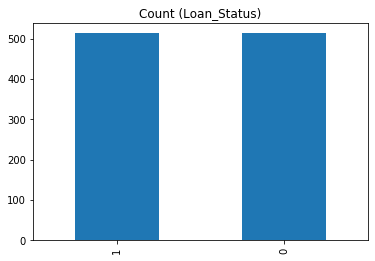

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.Loan_Status.value_counts())

df_test_over.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)')

### Random Undersampling

Random undersampling:
1    191
0    191
Name: Loan_Status, dtype: int64


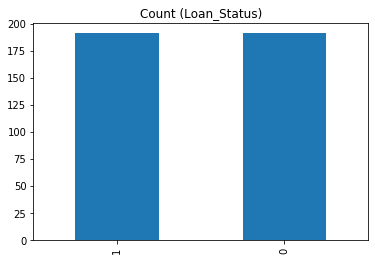

In [325]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random undersampling:')
print(df_test_under.Loan_Status.value_counts())

df_test_under.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)')

# Machine Learning

In [326]:
#Machine Learning
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE

#classifier evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [327]:
#split into X_train and y_train
y_train = train_df['Loan_Status']
X_train = train_df.drop('Loan_Status',axis=1)

### Oversampled Data

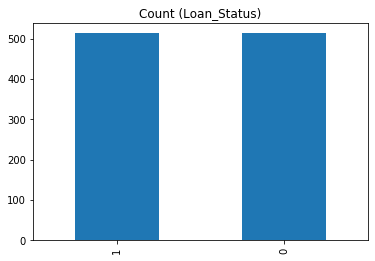

In [328]:
df2_test_over = pd.DataFrame(df_test_over)
df2_test_over.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

In [329]:
#split into X_train and y_train
X_over_train = df2_test_over.drop('Loan_Status',axis=1)
y_over_train = df2_test_over['Loan_Status']

##### i) Logistic Regression

In [333]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression(penalty = 'l2', solver = 'liblinear')
reg_classifier.fit(X_over_train, y_over_train)

#predicting the test set results
predictions = reg_classifier.predict(X_test)

Confusion matrix:
 [[ 52  26]
 [ 34 165]]


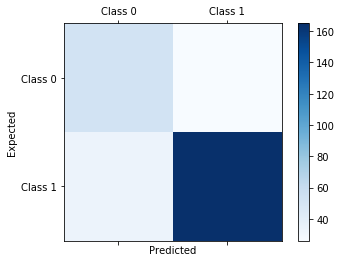

In [334]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [335]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 78.34%
 Precision: 86.39%
    Recall: 82.91%
  F1 score: 84.62%
 ROC score: 74.79%


### Undersampled Data

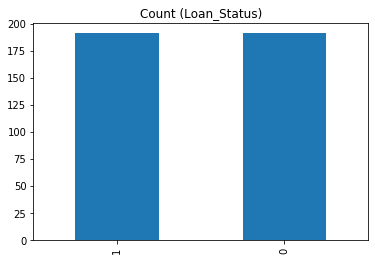

In [348]:
df2_test_under = pd.DataFrame(df_test_under)
df2_test_under.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)')

In [349]:
#split into X_train and y_train
X_under_train = df2_test_under.drop('Loan_Status',axis=1)
y_under_train = df2_test_under['Loan_Status']

##### i) Logistic Regression

In [350]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression(penalty = 'l2', solver = 'liblinear')
reg_classifier.fit(X_under_train, y_under_train)

#predicting the test set results
predictions = reg_classifier.predict(X_test)

Confusion matrix:
 [[ 54  24]
 [ 35 164]]


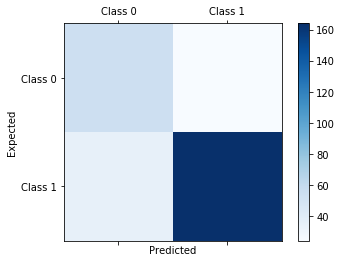

In [351]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [352]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 78.70%
 Precision: 87.23%
    Recall: 82.41%
  F1 score: 84.75%
 ROC score: 75.82%
